*ASSIGNMENT 1*

**BMDP RATHNAYAKE**

**D/ENG/21/0046/ET**

101
125
30
256


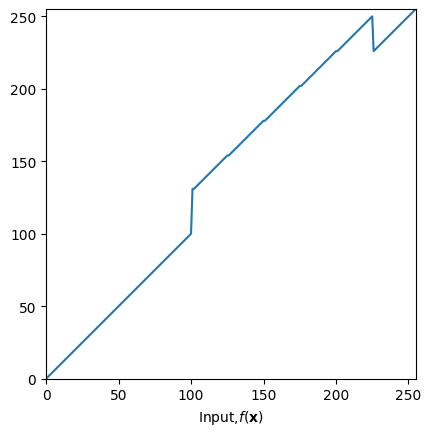

Text(0.5, 1.0, 'Transformed')

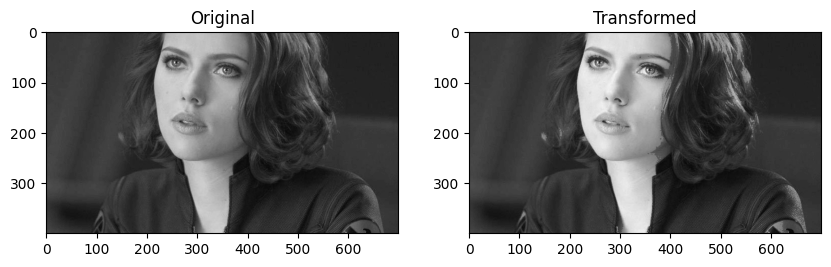

In [1]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('images/natasha.jpg',cv.IMREAD_GRAYSCALE)

c = np.array([(100,100),(225,225)])
t1=np.linspace(0,c[0,1], c[0,0]+1-0).astype('uint8')
print(len(t1))
#t2=np.linspace(c[0,1]+1,130,0).astype('uint8')
#print(len(t2))
t3=np.linspace(131,250,225-100).astype('uint8')
print(len(t3))
#t4=np.linspace(251,c[1,1],0).astype('uint8')
#print(len(t4))
t5=np.linspace(c[1,1]+1,255,255-c[1,1]).astype('uint8')
print(len(t5))

transform = np.concatenate((t1,t3),axis=0).astype('uint8')
transform = np.concatenate((transform,t5), axis=0).astype('uint8')
print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_label('output,$\mathrm{T}[f(\mathb{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

imgc=cv.LUT(img,transform)
fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(imgc, cmap="gray")
ax[1].set_title("Transformed")


**QUESTION 3**

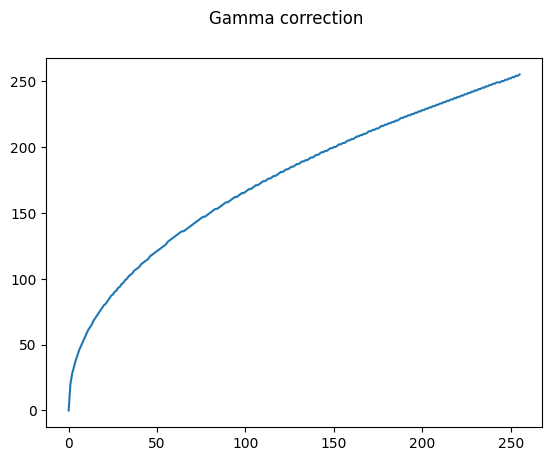

NameError: name 'cv' is not defined

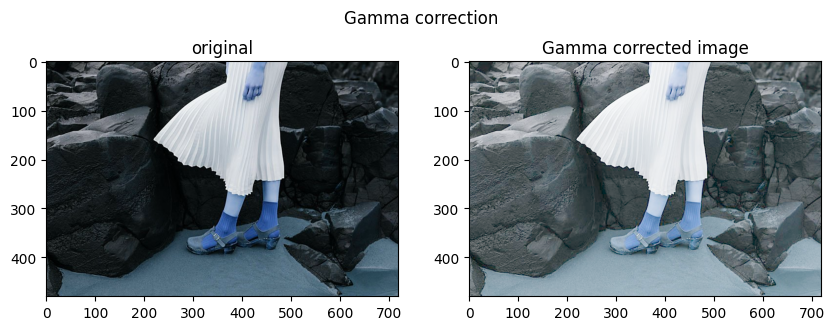

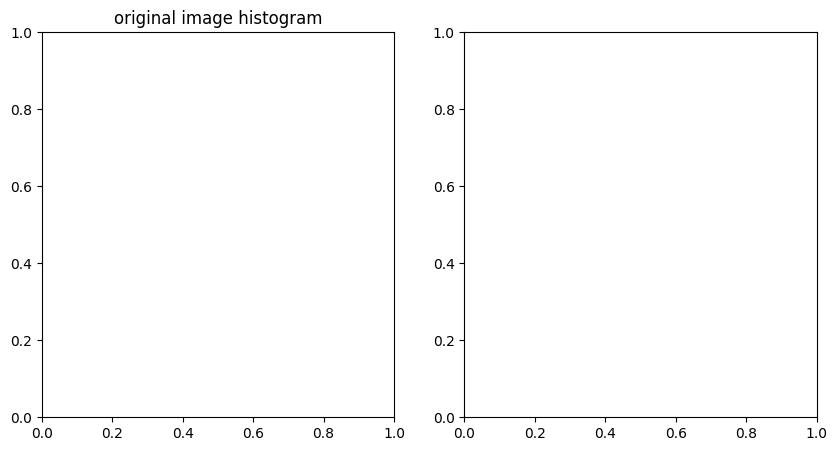

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    plt.suptitle("Gamma correction")
    plt.plot(table)
    plt.show()


    return cv2.LUT(src, table)


img = cv2.imread('images/white.jpg')
gammaImg = gammaCorrection(img, 2.2)


fig,ax = plt.subplots(1,2,figsize=(10,3.5))
fig.suptitle("Gamma correction")
ax[0].imshow( img)
ax[0].set_title("original")
ax[1].imshow(gammaImg)
ax[1].set_title("Gamma corrected image")

fig,ax = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.gca().set_title('original image histogram')
ori_his=cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(ori_his)
plt.show()

plt.subplot(1,2,2)
plt.gca().set_title('Gamma corrected histogram')
gam_his=cv.calcHist([gammaImg],[0],None,[256],[0,256])
plt.plot(gam_his)
plt.show()


**QUESTION 4**

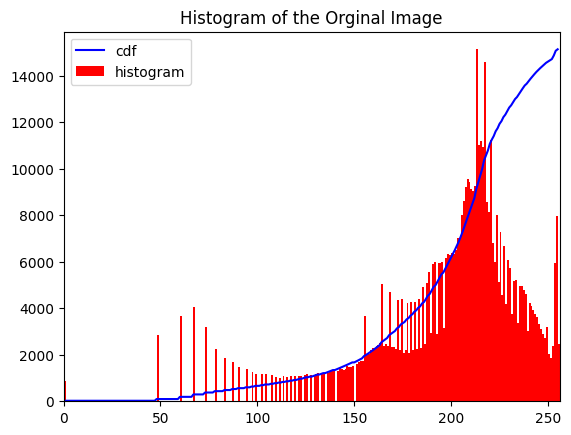

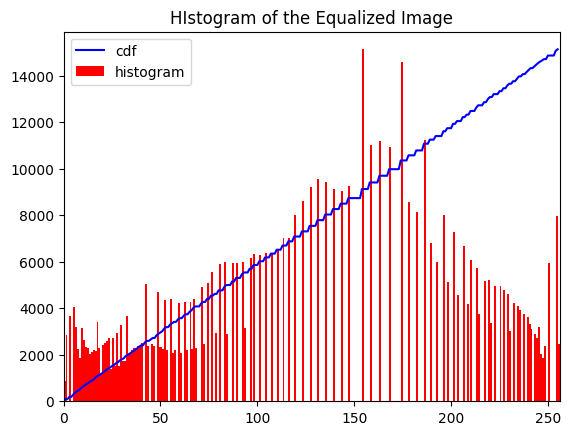

Text(0.5, 1.0, 'transformed')

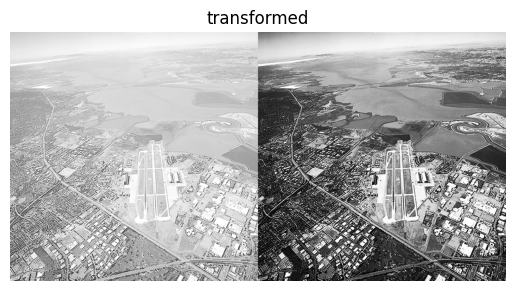

In [40]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
 
img= cv.imread('images/highway.tif',cv.IMREAD_GRAYSCALE)

hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the Orginal Image')
plt.show()

equ=cv.equalizeHist(img)

hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('HIstogram of the Equalized Image')
plt.show()

res=np.hstack((img,equ))#stacking images side by side
plt.axis('off')
plt.imshow (img,cmap='gray')
plt.title('transformed')
plt.imshow(res,cmap='gray')
plt.title('transformed')


**QUESTION 5**

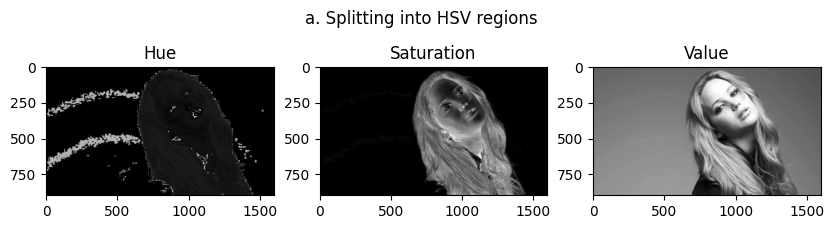

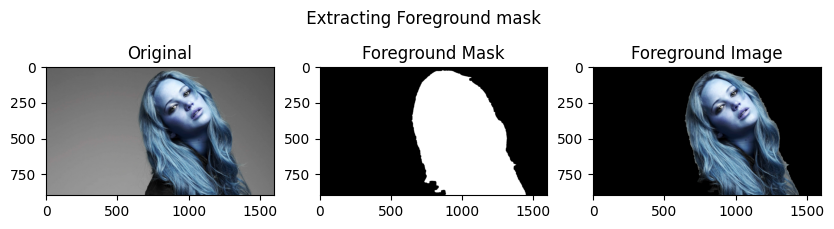

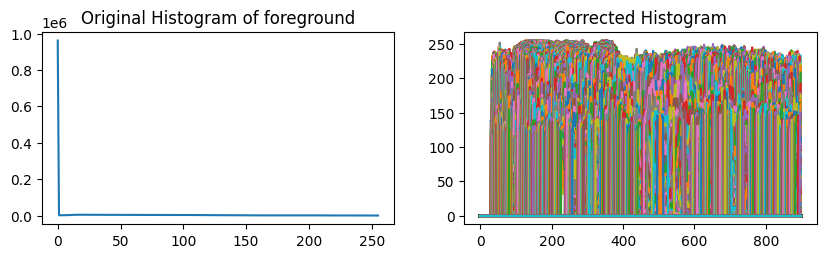

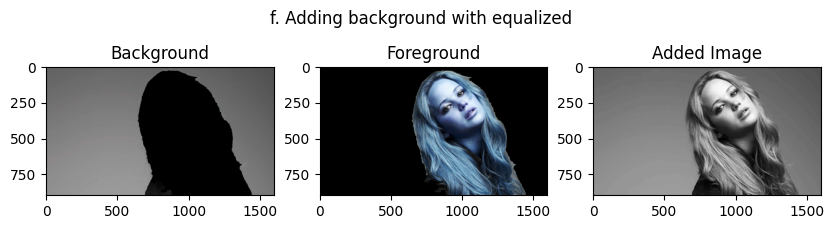

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
img = cv.imread('images/jennifer.jpeg', cv.IMREAD_COLOR)
assert img is not None

imgc = cv.cvtColor(im, cv.COLOR_BGR2HSV)
hue,saturate,value = cv.split(imgc)

fig, ax= plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("a. Splitting into HSV regions", fontsize=12)
ax[0].imshow(hue, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(saturate, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(value, cmap="gray")
ax[2].set_title('Value')
plt.show()

#Foreground image extractor
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])
thresh = cv.inRange(saturate, 15, 230)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
morph = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = morph
result = cv.bitwise_and(img, img, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle(" Extracting Foreground mask")
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Foreground Mask")
ax[2].imshow(result, cmap="gray")
ax[2].set_title("Foreground Image")
plt.show()

#histogram
cumulative_sum = np.cumsum(result) #cumulative sum

plt.figure(figsize = [10, 2.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram of foreground')
foregrnd = cv.calcHist([result],[0],None,[256],[0,256])
plt.plot(foregrnd)

plt.subplot(1, 2, 2)
plt.gca().set_title('Corrected Histogram')
result1 = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
eh = cv.equalizeHist(result1)
plt.plot(eh)
plt.show()

#background image
mask1 = 255 - morph
backgrnd = cv.bitwise_and(img, img, mask=mask1)
backgrnd1 = cv.cvtColor(backgrnd, cv.COLOR_BGR2GRAY);
#added image
imgadd = cv.addWeighted(backgrnd1,0.5, result1,0.5,0.0)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("f. Adding background with equalized")
ax[0].imshow(backgrnd, cmap="gray")
ax[0].set_title("Background")
ax[1].imshow(result, cmap="gray")
ax[1].set_title("Foreground")
ax[2].imshow(imgadd, cmap="gray")
ax[2].set_title("Added Image")
plt.show()
